# Employee Attrition 



**This notebook will contain**
* *Introduction*
* *Data cleaning*
* *Exploratory data analysis*
* *Predictive model* 
* *Evaluation* 
* *Conclusion* 

**regarding the attrition, the voluntary downsizing of the firm, where employees either resign or retire and aren't replaced by the company, according to [Investopedia](https://www.investopedia.com/terms/a/attrition.asp) (2021). This Notebook will predict whether employees have attrited (don't know if this is a word) or not.**

## Introduction

In [1]:
import seaborn as sns
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('EmployeeAttrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


***

I want to predict the "attrition" variable, therefore "attrition" is the Y - dependent variable. 
Next I need to pick a few independent variables and make a df_subset. 

***

## Data cleaning

**Exploring different independent variables**

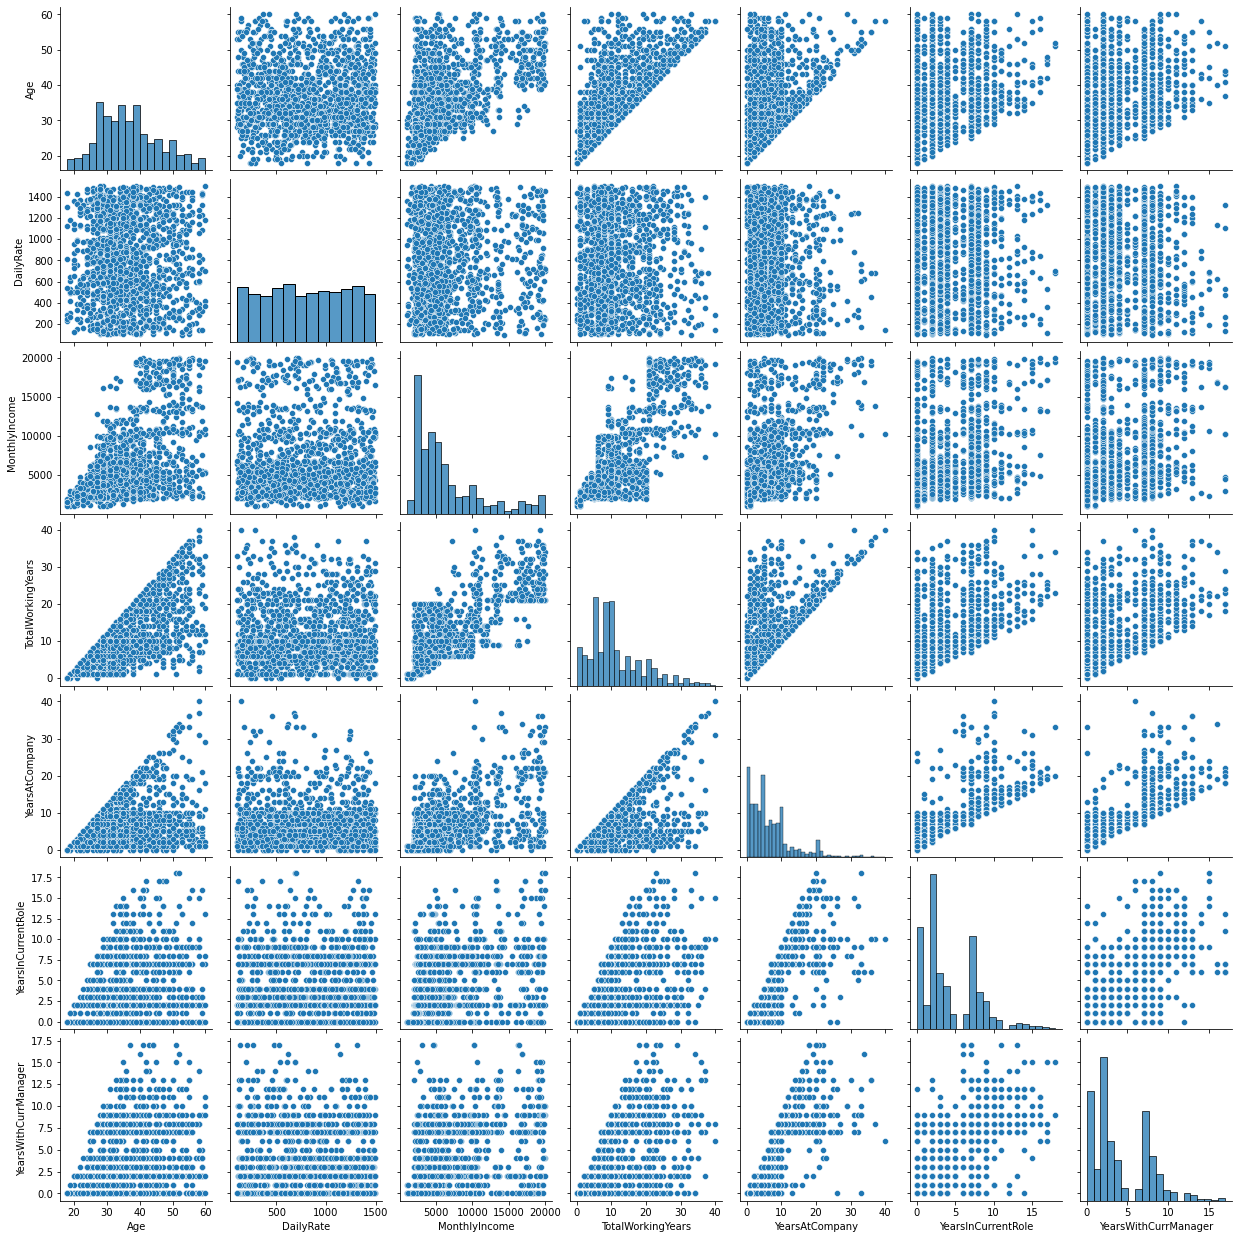

In [3]:
df_subset = df[['Attrition', 'Age', 'Gender', 'DailyRate', 'MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsWithCurrManager']]
sns.pairplot(df_subset)
plt.show()

In [4]:
df_subset.corr()

,Age,DailyRate,MonthlyIncome,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager
Age,1.000000,0.010661,0.497855,0.680381,0.311309,0.212901,0.202089
DailyRate,0.010661,1.000000,0.007707,0.014515,-0.034055,0.009932,-0.026363
MonthlyIncome,0.497855,0.007707,1.000000,0.772893,0.514285,0.363818,0.344079
TotalWorkingYears,0.680381,0.014515,0.772893,1.000000,0.628133,0.460365,0.459188
YearsAtCompany,0.311309,-0.034055,0.514285,0.628133,1.000000,0.758754,0.769212
YearsInCurrentRole,0.212901,0.009932,0.363818,0.460365,0.758754,1.000000,0.714365
YearsWithCurrManager,0.202089,-0.026363,0.344079,0.459188,0.769212,0.714365,1.000000


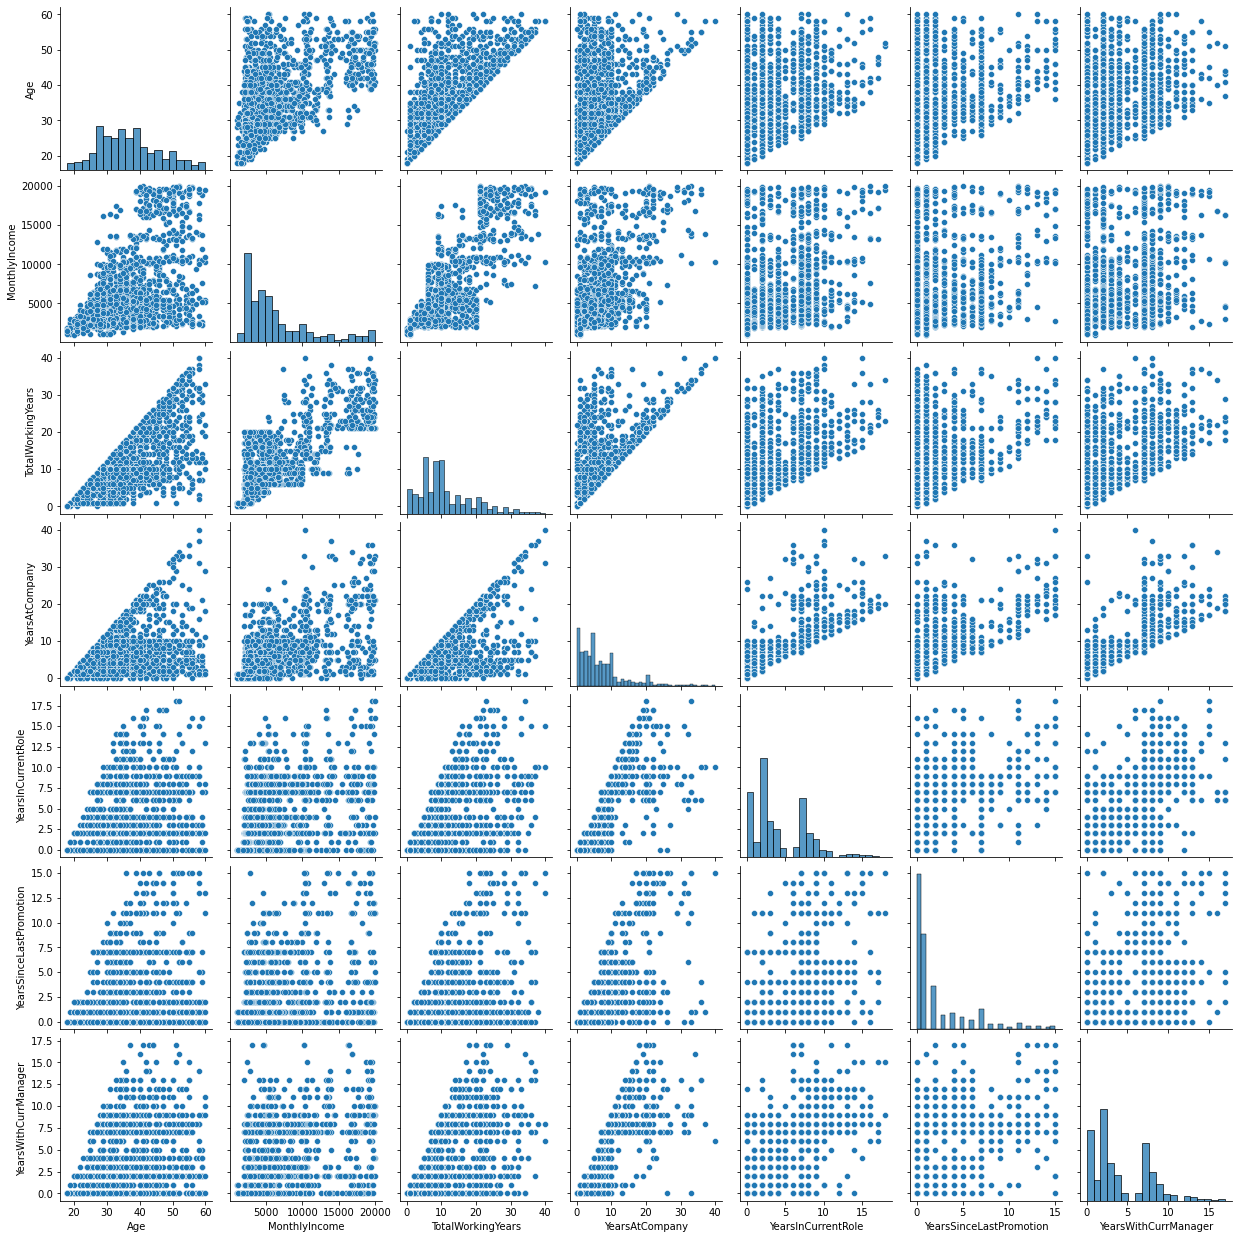

In [5]:
df_subset02 = df[['Attrition', 'Age', 'Gender', 'MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']]
sns.pairplot(df_subset02)
plt.show()

In [67]:
df_subset02.corr()

,Age,MonthlyIncome,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.497855,0.680381,0.311309,0.212901,0.216513,0.202089
MonthlyIncome,0.497855,1.000000,0.772893,0.514285,0.363818,0.344978,0.344079
TotalWorkingYears,0.680381,0.772893,1.000000,0.628133,0.460365,0.404858,0.459188
YearsAtCompany,0.311309,0.514285,0.628133,1.000000,0.758754,0.618409,0.769212
YearsInCurrentRole,0.212901,0.363818,0.460365,0.758754,1.000000,0.548056,0.714365
YearsSinceLastPromotion,0.216513,0.344978,0.404858,0.618409,0.548056,1.000000,0.510224
YearsWithCurrManager,0.202089,0.344079,0.459188,0.769212,0.714365,0.510224,1.000000


***

These are the final variables which I chose because in the correlation table all DP have at least one r>0.5.

***

## Exploratory data analysis 

`Now I am exploring different variables to better see the correlations that the categorical variables such as "Gender" or "OverTime" might bring`

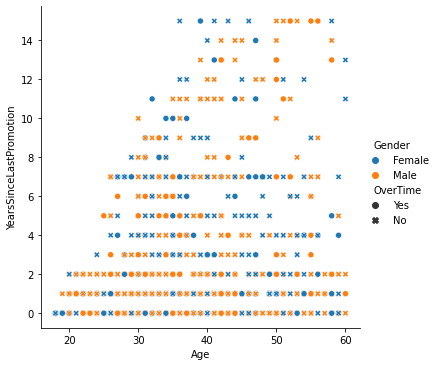

In [75]:
#sns.scatterplot(data=df, x="Age", y="YearsSinceLastPromotion")
sns.relplot(
    data=df, x="Age", y="YearsSinceLastPromotion",
    hue="Gender", style="OverTime",
    kind="scatter"
)

<AxesSubplot:xlabel='YearsAtCompany', ylabel='YearsInCurrentRole'>

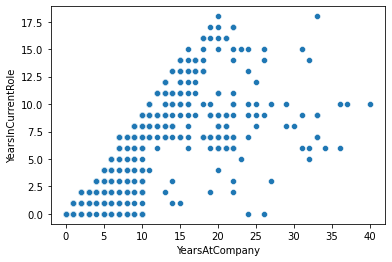

In [34]:
sns.scatterplot(data=df, x="YearsAtCompany", y="YearsInCurrentRole")

<AxesSubplot:xlabel='MonthlyIncome', ylabel='TotalWorkingYears'>

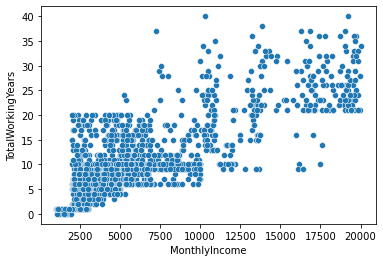

In [35]:
sns.scatterplot(data=df, x="MonthlyIncome", y="TotalWorkingYears")

``

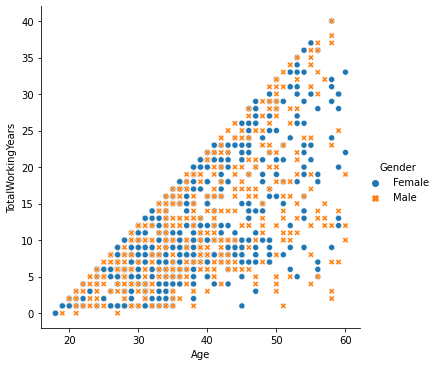

In [36]:
sns.relplot(
    data=df, x="Age", y="TotalWorkingYears",
    hue="Gender", style="Gender",
    kind="scatter"
)

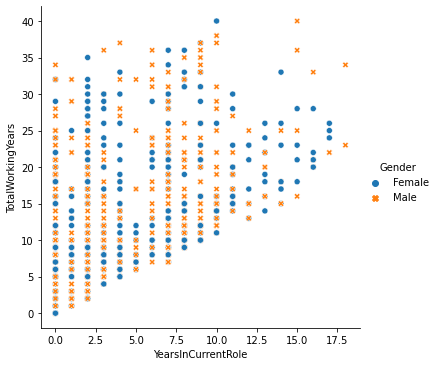

In [42]:
sns.relplot(
    data=df, x="YearsInCurrentRole", y="TotalWorkingYears",
    hue="Gender", style="Gender",
    kind="scatter"
)

In [37]:
df['TotalWorkingYears'].value_counts()

10    202
6     125
8     103
9      96
5      88
7      81
1      81
4      63
12     48
3      42
15     40
16     37
13     36
11     36
21     34
17     33
14     31
2      31
20     30
18     27
19     22
23     22
22     21
24     18
28     14
25     14
26     14
0      11
29     10
31      9
32      9
27      7
30      7
33      7
36      6
34      5
37      4
35      3
40      2
38      1
Name: TotalWorkingYears, dtype: int64

In [1]:
sns.countplot(x='TotalWorkingYears', hue="Gender", data=df)

NameError: name 'sns' is not defined

In [20]:
df = df_subset.dropna() 
df.head()
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

`Creating a dummy variable for the 'gender' variable`

In [21]:
dummies = pd.get_dummies(df['Gender'])
df = pd.concat([df, dummies], axis=1)
df.head()

,Attrition,Age,Gender,DailyRate,MonthlyIncome,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager,Female,Male
0,Yes,41,Female,1102,5993,8,6,4,5,1,0
1,No,49,Male,279,5130,10,10,7,7,0,1
2,Yes,37,Male,1373,2090,7,0,0,0,0,1
3,No,33,Female,1392,2909,8,8,7,0,1,0
4,No,27,Male,591,3468,6,2,2,2,0,1
